**About this notebook**

This notebook fine-tunes the ResNet50 model.  The codes were largely based on Chapter 5 of this book:

https://www.manning.com/books/deep-learning-with-python

### - create batches of augmented images

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 2567 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


### - download pre-trained ResNet50 model

In [5]:
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [6]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 24,113,541
Trainable params: 24,060,421
Non-trainable params: 53,120
_________________________________________________________________


### - freeze layers and set specific ones for training

In [9]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'res5c_branch2a':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
model.compile(loss='categorical_crossentropy',
                      optimizer=optimizers.Adam(lr=1e-5),
                      metrics=['acc'])

In [11]:
history = model.fit_generator(
              train_generator,
              steps_per_epoch=81,
              epochs=100,
              validation_data=validation_generator,
              validation_steps=23)

Epoch 1/100
81/81 [==============================] - 47s 580ms/step - loss: 1.4572 - acc: 0.4144 - val_loss: 1.0158 - val_acc: 0.6717
Epoch 2/100
81/81 [==============================] - 41s 506ms/step - loss: 0.9387 - acc: 0.6938 - val_loss: 0.6782 - val_acc: 0.7934
Epoch 3/100
81/81 [==============================] - 41s 511ms/step - loss: 0.7125 - acc: 0.7662 - val_loss: 0.5323 - val_acc: 0.8167
Epoch 4/100
81/81 [==============================] - 41s 511ms/step - loss: 0.5740 - acc: 0.8130 - val_loss: 0.4565 - val_acc: 0.8372
Epoch 5/100
81/81 [==============================] - 41s 511ms/step - loss: 0.4903 - acc: 0.8429 - val_loss: 0.4051 - val_acc: 0.8605
Epoch 6/100
81/81 [==============================] - 41s 503ms/step - loss: 0.4423 - acc: 0.8528 - val_loss: 0.3809 - val_acc: 0.8673
Epoch 7/100
81/81 [==============================] - 42s 517ms/step - loss: 0.4146 - acc: 0.8549 - val_loss: 0.3540 - val_acc: 0.8865
Epoch 8/100
81/81 [==============================] - 40s 498ms

Epoch 62/100
81/81 [==============================] - 41s 506ms/step - loss: 0.0408 - acc: 0.9867 - val_loss: 0.2762 - val_acc: 0.9138
Epoch 63/100
81/81 [==============================] - 41s 512ms/step - loss: 0.0477 - acc: 0.9857 - val_loss: 0.2743 - val_acc: 0.9166
Epoch 64/100
81/81 [==============================] - 42s 519ms/step - loss: 0.0568 - acc: 0.9867 - val_loss: 0.2824 - val_acc: 0.9193
Epoch 65/100
81/81 [==============================] - 41s 501ms/step - loss: 0.0409 - acc: 0.9900 - val_loss: 0.2793 - val_acc: 0.9193
Epoch 66/100
81/81 [==============================] - 41s 511ms/step - loss: 0.0558 - acc: 0.9816 - val_loss: 0.2856 - val_acc: 0.9193
Epoch 67/100
81/81 [==============================] - 41s 501ms/step - loss: 0.0464 - acc: 0.9853 - val_loss: 0.2836 - val_acc: 0.9179
Epoch 68/100
81/81 [==============================] - 41s 507ms/step - loss: 0.0403 - acc: 0.9896 - val_loss: 0.2848 - val_acc: 0.9220
Epoch 69/100
81/81 [==============================] - 4

### - smooth the plots

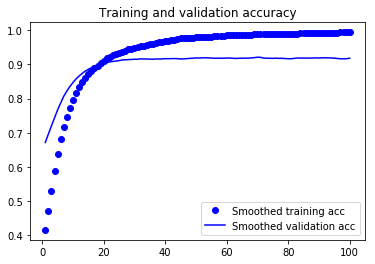

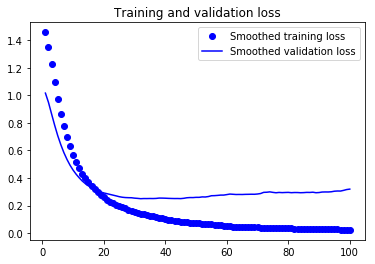

In [14]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
              smoothed_points.append(point)
    return smoothed_points

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
#Evaluate model
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 372 images belonging to 5 classes.
test acc: 0.939432989229861


In [16]:
model.save('flowers_resnet50_3.h5')